# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Putri Indah Sari
- **Email:** putri04213@gmail.com
- **ID Dicoding:** MC813D5X1836

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012?
- Bagaimana pengaruh hari kerja dan libur terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

## Data Wrangling

### Gathering Data

saya melakukan import data set melalui google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
day_df = pd.read_csv ("/content/drive/MyDrive/day.csv")

data berhasil terupload dan siap untuk dilakukan assesing dan cleaning data.

### Assesing data

#### data hour

In [4]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


tidak ada missing values pada dat hour

In [5]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada data duplikat shingga tidak perlu dibersihkan

In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


detail statistika data hour

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


data type dataset hour terdapat tipe data int dan object terjadi kesalahan disini yaitu bisa kita lihat **dteday seharusnya bukan object melainkan datetime**

#### data day

In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


pada data day tidak ada missing values,dan tidak perlu melakukan pembersihan data.

In [9]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


data day tidak memiliki jumlah duplikasi untuk dilakukan langkah cleanong data

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


menampilkan statistika detail dari data day

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


menampilkan detail tipe data kolom day, dan terdaoat kesalahan di tipe data **data dteday dalam data day perlu diganti data typenya menjadi datetime**

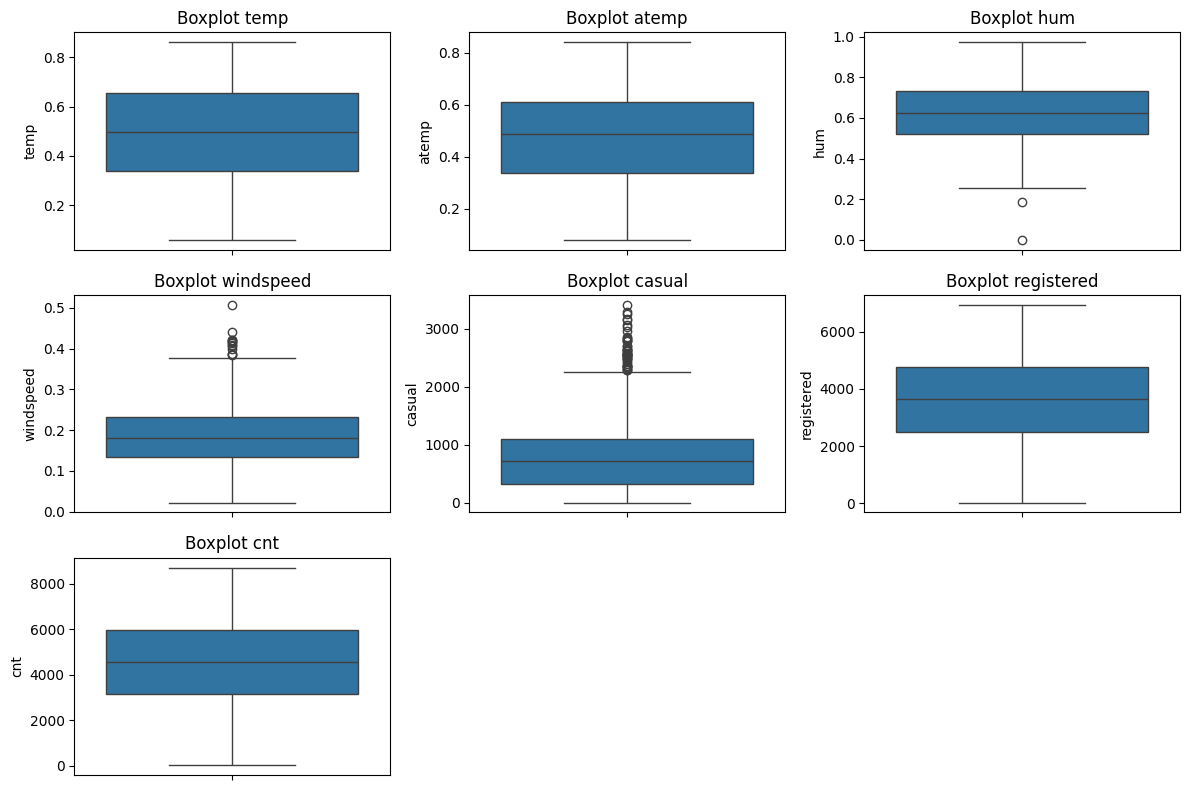

In [12]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=day_df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

melihat outliner data day menggunakan boxplot

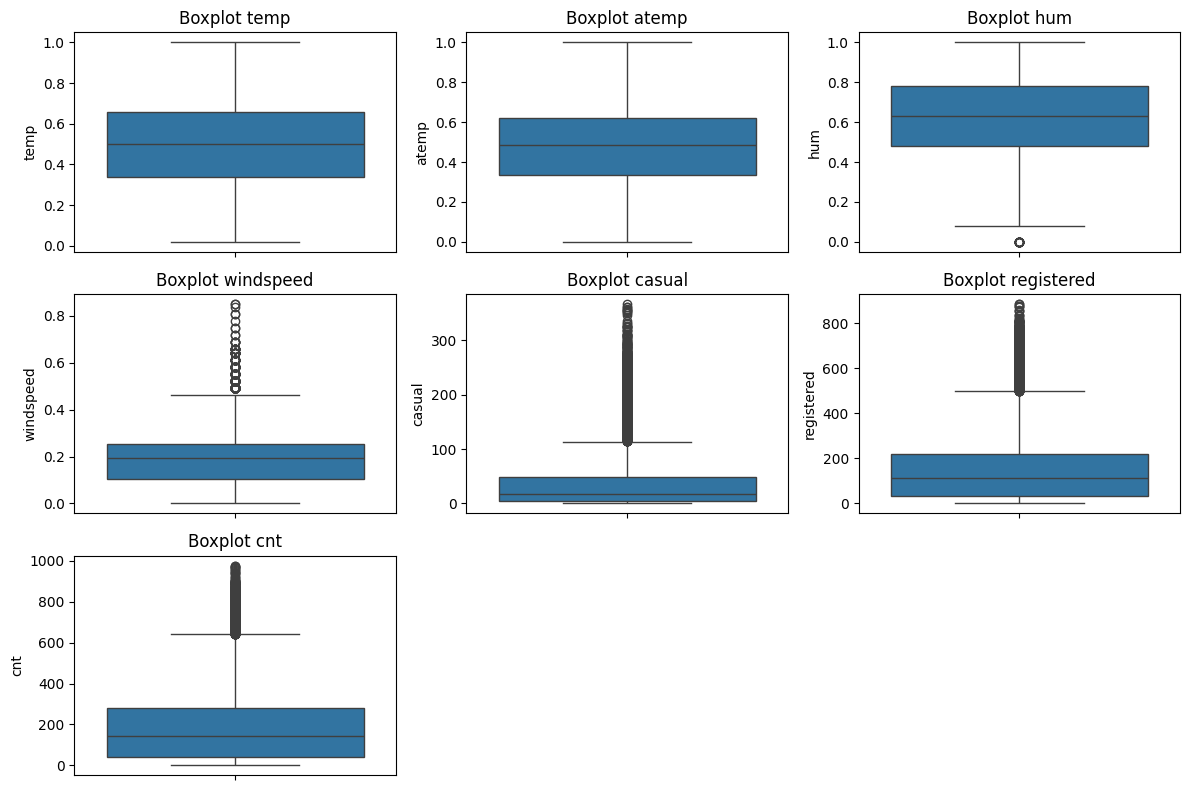

In [13]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=hour_df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

melihat outliner data hour menggunakan boxplot

#### **Insight**
- data dteday dalam data day perlu diganti data typenya menjadi datetime
- data dteday dalam data hour perlu diganti data typenya juga menjadi datetime
- lalu ada beberapa outliner di data day dan hour yang harus ditangani



### Cleaning Data

In [14]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

mengganti tipe data dteday ke datetime

In [15]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(hour_df[column])

mengganti tipe data dteday ke datetime

In [16]:
  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df.reset_index(drop=True)

membuat fungsi handling outliner dengan metode IQR

In [19]:
hour_df = remove_outliers_iqr(hour_df)

menerapkan fungsi handling outliner ke data hour

In [20]:
day_df = remove_outliers_iqr(day_df)

menerapkan fungsi handling outliner ke data day

#### **Insight**

- menganti tipe data data hour dan day menjadi datetime
- handling outliner di data day dan hour dengan metode IQR

## Exploratory Data Analysis (EDA)

Pertanyaan Bisnis:
- Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012?
- Bagaimana perbedaan rata-rata jumlah penyewaan sepeda antara hari libur dan hari kerja selama tahun 2011–2012?

#### data hour

In [21]:
print(hour_df['cnt'].describe())

count    14534.000000
mean       141.949291
std        122.131159
min          1.000000
25%         32.000000
50%        117.000000
75%        223.000000
max        512.000000
Name: cnt, dtype: float64


Statistik umum

In [22]:
print(hour_df['season'].value_counts().sort_index())

season
1    3752
2    3564
3    3626
4    3592
Name: count, dtype: int64


Distribusi per musim

In [23]:
print(hour_df['yr'].value_counts().sort_index())

yr
0    7653
1    6881
Name: count, dtype: int64


Distribusi per tahun

In [24]:
print(hour_df.groupby('season')['cnt'].mean())

season
1     98.541578
2    147.894781
3    170.318257
4    152.753898
Name: cnt, dtype: float64


Rata-rata penyewaan per musim

In [25]:
print(hour_df.groupby('season')['cnt'].sum())

season
1    369728
2    527097
3    617574
4    548692
Name: cnt, dtype: int64


Total penyewaan per musim

In [26]:
print(hour_df.groupby('yr')['cnt'].mean())

yr
0    123.728995
1    162.213777
Name: cnt, dtype: float64


Rata-rata penyewaan per tahun

In [27]:
print(hour_df.groupby('holiday')['cnt'].mean())

holiday
0    141.949291
Name: cnt, dtype: float64


Rata-rata penyewaan per holiday

In [28]:
print(hour_df.groupby('workingday')['cnt'].mean())

workingday
0    114.182513
1    152.214966
Name: cnt, dtype: float64


Rata-rata penyewaan per workingday

In [29]:
print(hour_df.groupby('hr')['cnt'].mean())

hr
0      53.967143
1      33.420977
2      22.870451
3      11.788376
4       6.431784
5      20.189855
6      77.547278
7     188.683230
8     233.432836
9     220.855263
10    150.850080
11    168.105705
12    204.924731
13    201.643494
14    184.464815
15    198.713235
16    268.840741
17    267.401338
18    269.795518
19    265.646630
20    225.190760
21    174.828035
22    132.897695
23     89.244286
Name: cnt, dtype: float64


Distribusi rata-rata penyewaan per jam

In [30]:
print(hour_df.groupby('hr')['cnt'].sum())

hr
0      37777
1      23261
2      15712
3       7910
4       4290
5      13931
6      54128
7     121512
8     109480
9     151065
10     94583
11    100191
12    114348
13    113122
14     99611
15    108100
16    145174
17     79953
18     96317
19    145840
20    151103
21    120981
22     92231
23     62471
Name: cnt, dtype: int64


Distribusi jumlah penyewaan per jam

#### data day

In [31]:
print(day_df['cnt'].describe())

count     655.000000
mean     4397.757252
std      1854.957213
min        22.000000
25%      3129.000000
50%      4456.000000
75%      5651.000000
max      8173.000000
Name: cnt, dtype: float64


Statistik umum

In [32]:
print(day_df['season'].value_counts().sort_index())

season
1    164
2    158
3    170
4    163
Name: count, dtype: int64


Distribusi per musim

In [33]:
print(day_df.groupby('season')['cnt'].mean())

season
1    2610.908537
2    4773.316456
3    5541.664706
4    4638.496933
Name: cnt, dtype: float64


Rata-rata penyewaan per musim

In [34]:
print(day_df.groupby('season')['cnt'].sum())

season
1    428189
2    754184
3    942083
4    756075
Name: cnt, dtype: int64


Total penyewaan per musim

In [35]:
print(day_df['yr'].value_counts().sort_index())

yr
0    344
1    311
Name: count, dtype: int64


Distribusi per tahun

In [36]:
print(day_df.groupby('yr')['cnt'].mean())

yr
0    3412.773256
1    5487.257235
Name: cnt, dtype: float64


Rata-rata penyewaan per tahun

In [37]:
print(day_df.groupby('holiday')['cnt'].mean())

holiday
0    4397.757252
Name: cnt, dtype: float64


Rata-rata penyewaan berdasarkan hari libur

In [38]:
print(day_df.groupby('workingday')['cnt'].mean())

workingday
0    3800.054545
1    4599.024490
Name: cnt, dtype: float64


Rata-rata penyewaan berdasarkan hari kerja

In [39]:
print(day_df.groupby('weekday')['cnt'].mean())

weekday
0    3833.816092
1    4428.873563
2    4571.578431
3    4532.049020
4    4760.353535
5    4683.650000
6    3762.397436
Name: cnt, dtype: float64


Rata-rata penyewaan per hari dalam seminggu

In [40]:
print(day_df.groupby('mnth')['cnt'].mean())

mnth
1     2177.724138
2     2731.509804
3     3461.000000
4     4324.980392
5     5167.830189
6     5548.188679
7     5474.125000
8     5608.416667
9     5558.360000
10    5068.240741
11    4262.218182
12    3507.745763
Name: cnt, dtype: float64


Rata-rata penyewaan per bulan

#### **Insight**

### Data Hour (`hour_df`):

* **Statistik Umum**: Rata-rata penyewaan per jam adalah sekitar 142 sepeda.
* **Penyewaan Tertinggi**: Terjadi pada musim gugur dan musim panas.
* **Perbandingan Tahun**: Tahun 2012 memiliki penyewaan lebih tinggi dari 2011.
* **Jam Sibuk**: Pola peminjaman tertinggi pada pukul 8 pagi dan 5-6 sore, menunjukkan pola penggunaan sepeda untuk berangkat dan pulang kerja.

### Data Day (`day_df`):

* **Statistik Umum**: Rata-rata penyewaan harian sekitar 4.598 sepeda.
* **Musim Populer**: Musim panas dan gugur memiliki penyewaan tertinggi, sedangkan musim semi terendah.
* **Pertumbuhan Tahunan**: Tahun 2012 lebih tinggi dibanding 2011.
* **Hari Kerja vs Libur**: Hari kerja menunjukkan jumlah penyewaan lebih tinggi dibandingkan hari libur.
* **Pola Bulanan**: Penyewaan tertinggi terjadi pada bulan Juni hingga Oktober (musim panas-gugur).


## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012?

In [41]:
sns.set_theme(style='whitegrid')

<ipython-input-45-db159647cea9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


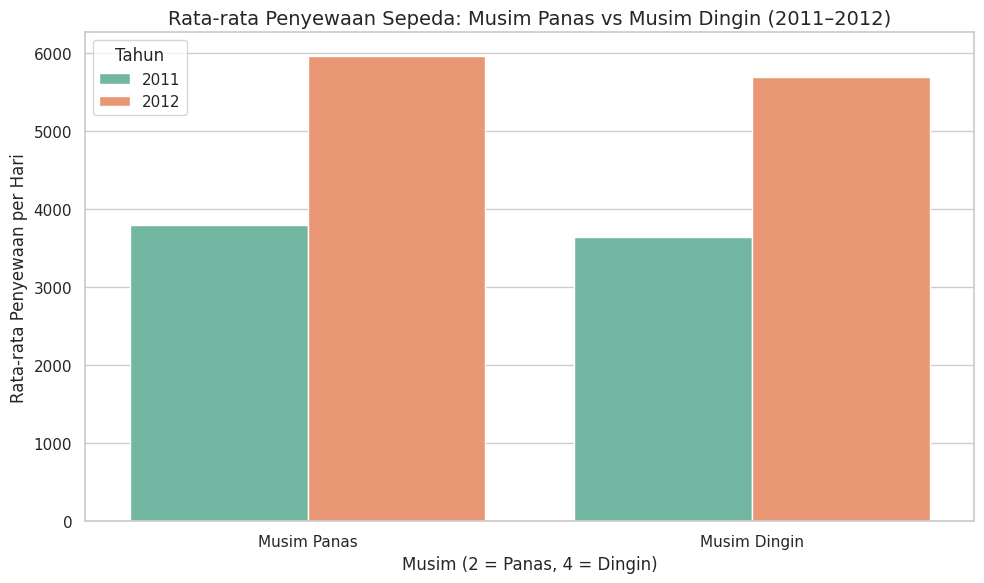

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=day_df[day_df['season'].isin([2, 4])],
    x='season',
    y='cnt',
    hue='yr',
    palette='Set2',
    ci=None
)
plt.title('Rata-rata Penyewaan Sepeda: Musim Panas vs Musim Dingin (2011–2012)', fontsize=14)
plt.xlabel('Musim (2 = Panas, 4 = Dingin)', fontsize=12)
plt.ylabel('Rata-rata Penyewaan per Hari', fontsize=12)
plt.xticks([0, 1], ['Musim Panas', 'Musim Dingin'])
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.tight_layout()
plt.show()

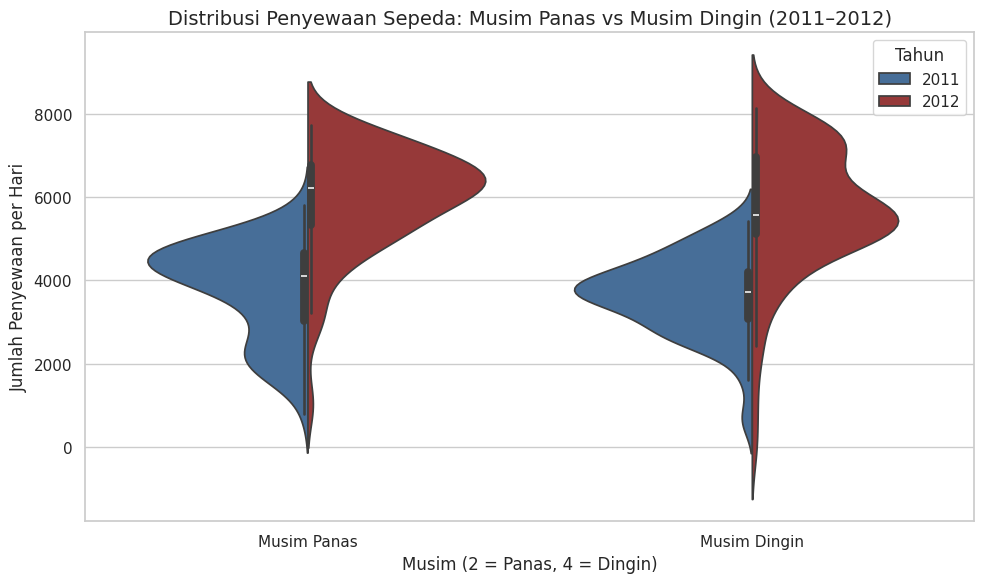

In [48]:
plt.figure(figsize=(10, 6))
plot = sns.violinplot(
    data=day_df[day_df['season'].isin([2, 4])],
    x='season',
    y='cnt',
    hue='yr',
    split=True,
    palette=['#3A6EA5', '#A52A2A']
)
plt.title('Distribusi Penyewaan Sepeda: Musim Panas vs Musim Dingin (2011–2012)', fontsize=14)
plt.xlabel('Musim (2 = Panas, 4 = Dingin)', fontsize=12)
plt.ylabel('Jumlah Penyewaan per Hari', fontsize=12)
plt.xticks([0, 1], ['Musim Panas', 'Musim Dingin'])
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, ['2011', '2012'], title='Tahun')
plt.tight_layout()
plt.show()

#### **Insight**

**Pertanyaan 1:**

**Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011–2012?**

**Visualisasi 1 – Violin Plot (Distribusi)**

* Tahun 2012 menunjukkan distribusi penyewaan sepeda yang lebih tinggi dibandingkan tahun 2011, baik pada musim panas maupun musim dingin.
* Sebaran penyewaan di tahun 2012 lebih terkonsentrasi di level atas, menunjukkan kenaikan penggunaan yang konsisten.
* Di kedua musim, pola distribusi 2012 terlihat lebih padat di rentang >5000 penyewaan per hari.

**Visualisasi 2 – Barplot (Rata-rata)**

* Rata-rata penyewaan per hari meningkat signifikan dari 2011 ke 2012 di kedua musim.
* Peningkatan terbesar terlihat pada musim panas, dari sekitar 3800 menjadi hampir 6000 penyewaan per hari.
* Musim panas dan musim dingin di tahun 2012 keduanya memiliki rata-rata yang lebih tinggi dibandingkan tahun 2011.


### Pertanyaan 2:
- Bagaimana pengaruh hari kerja dan libur terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

In [50]:
combined_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

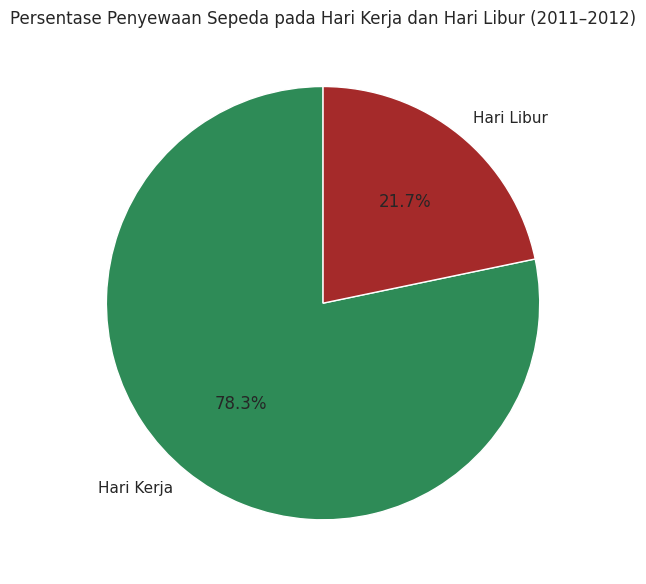

In [51]:
workday_counts = combined_df.groupby('workingday_day')[['registered_day', 'casual_day']].sum()
total_workday = workday_counts['registered_day'][1] + workday_counts['casual_day'][1]
total_holiday = workday_counts['registered_day'][0] + workday_counts['casual_day'][0]
plt.figure(figsize=(8, 6))
plt.pie(
    [total_workday, total_holiday],
    labels=['Hari Kerja', 'Hari Libur'],
    colors=['#2E8B57', '#A52A2A'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Persentase Penyewaan Sepeda pada Hari Kerja dan Hari Libur (2011–2012)')
plt.tight_layout()
plt.show()


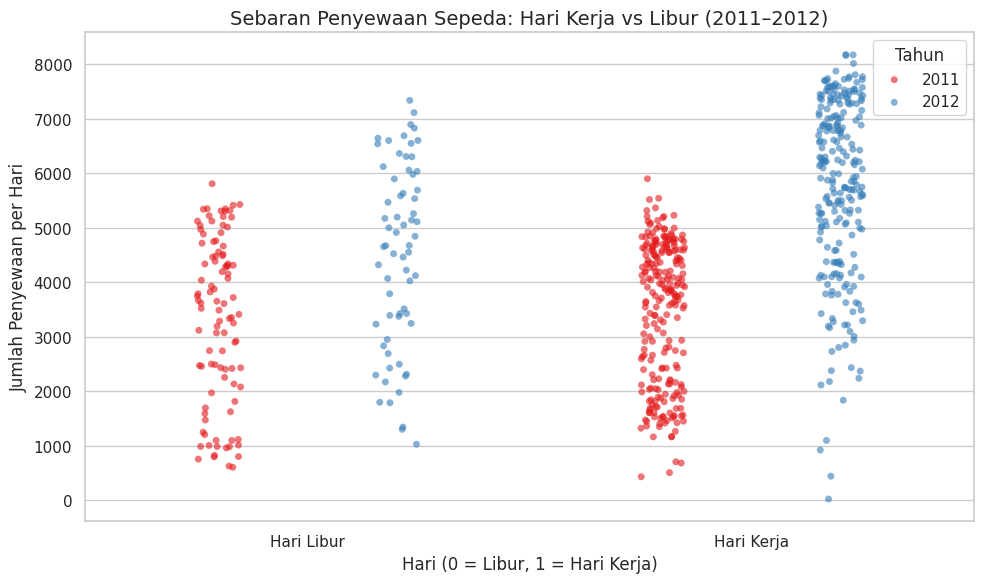

In [52]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=day_df,
    x='workingday',
    y='cnt',
    hue='yr',
    dodge=True,
    palette='Set1',
    alpha=0.6,
    jitter=True
)
plt.title('Sebaran Penyewaan Sepeda: Hari Kerja vs Libur (2011–2012)', fontsize=14)
plt.xlabel('Hari (0 = Libur, 1 = Hari Kerja)', fontsize=12)
plt.ylabel('Jumlah Penyewaan per Hari', fontsize=12)
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.tight_layout()
plt.show()

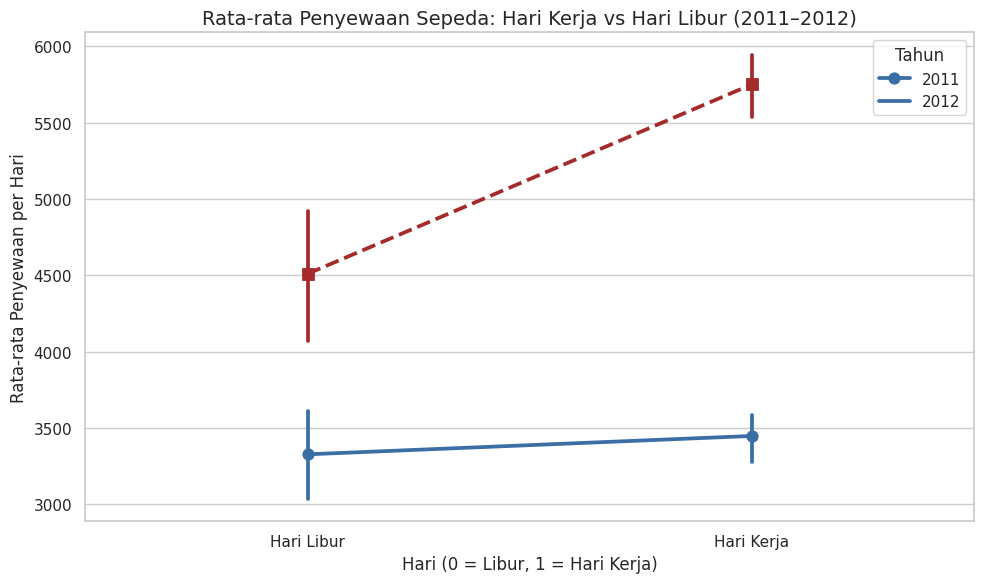

In [53]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    data=day_df,
    x='workingday',
    y='cnt',
    hue='yr',
    palette=['#3A6EA5', '#A52A2A'],
    markers=['o', 's'],
    linestyles=['-', '--']
)
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur (2011–2012)', fontsize=14)
plt.xlabel('Hari (0 = Libur, 1 = Hari Kerja)', fontsize=12)
plt.ylabel('Rata-rata Penyewaan per Hari', fontsize=12)
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.tight_layout()
plt.show()

#### **Insight**

**Pertanyaan 2:**

**Bagaimana pengaruh hari kerja dan libur terhadap jumlah penyewaan sepeda pada tahun 2011–2012?**

**Visualisasi 1 – Pie Chart (Proporsi Total Penyewaan)**

* Sebanyak **78.3%** dari total penyewaan sepeda terjadi pada hari kerja.
* Hanya **21.7%** terjadi pada hari libur, menunjukkan peran utama sepeda sebagai alat transportasi harian dibanding rekreasi.

**Visualisasi 2 – Stripplot (Sebaran Jumlah Penyewaan)**

* Hari kerja memiliki jumlah penyewaan yang lebih tinggi dan sebaran yang lebih luas dibanding hari libur, terutama di tahun 2012.
* Titik-titik tahun 2012 lebih terkonsentrasi di angka tinggi (≥6000), menandakan lonjakan permintaan sepeda pada hari kerja.
* Sebaliknya, hari libur memiliki penyewaan yang lebih rendah dan lebih tersebar secara acak.

**Visualisasi 3 – Pointplot (Rata-rata per Hari)**

* Tahun 2012 menunjukkan lonjakan signifikan pada hari kerja dibandingkan hari libur, dari \~4500 ke hampir 5800 penyewaan per hari.
* Tahun 2011 mengalami peningkatan yang lebih kecil antara hari libur dan hari kerja (\~3300 ke \~3450).
* Pola ini menunjukkan bahwa pada tahun 2012, sepeda lebih sering digunakan untuk aktivitas produktif seperti transportasi kerja.


### **Insight Kedua pertanyaan**

1. Pengaruh Musim terhadap Penyewaan
Penyewaan sepeda relatif tinggi pada musim panas dan musim dingin, namun rata-rata pada musim panas sedikit lebih tinggi. Tahun 2012 menunjukkan distribusi penyewaan yang lebih terkonsentrasi pada level tinggi di kedua musim dibandingkan 2011. Hal ini terlihat dari grafik distribusi (violin plot) yang memperlihatkan kepadatan nilai penyewaan pada kisaran 5000–7000 sepeda per hari. Sementara itu, barplot menunjukkan bahwa baik musim panas maupun musim dingin di tahun 2012 mengalami kenaikan yang besar, menandakan bahwa penggunaan sepeda berlangsung secara aktif sepanjang tahun. Tidak ada kecenderungan musiman ekstrem, karena penyewaan tetap tinggi bahkan pada musim dingin.

2. Pengaruh Hari Kerja dan Hari Libur terhadap Penyewaan
Hari kerja secara konsisten memiliki jumlah penyewaan lebih tinggi dibanding hari libur. Pada tahun 2012, rata-rata penyewaan per hari kerja mencapai hampir 5800, jauh lebih tinggi dibandingkan hari libur yang hanya sekitar 4500. Sebaliknya, pada tahun 2011, perbedaan antara hari kerja dan hari libur tidak terlalu mencolok (sekitar 3300 vs 3450). Visualisasi stripplot memperkuat temuan ini, dengan sebaran titik-titik penyewaan yang jauh lebih tinggi dan padat pada hari kerja tahun 2012. Selain itu, pie chart menunjukkan bahwa sebanyak 78.3% dari total penyewaan terjadi pada hari kerja, sedangkan hanya 21.7% terjadi pada hari libur. Ini menunjukkan bahwa mayoritas pengguna memanfaatkan sepeda sebagai alat transportasi untuk aktivitas produktif seperti berangkat kerja, bukan hanya untuk rekreasi.

## Analisis Lanjutan (Clustering)

In [54]:
clustering_df = day_df.copy()
q_low = clustering_df['cnt'].quantile(0.33)
q_high = clustering_df['cnt'].quantile(0.66)

def assign_cluster(cnt):
    if cnt < q_low:
        return 'Sepi'
    elif cnt < q_high:
        return 'Normal'
    else:
        return 'Sibuk'

clustering_df['cluster'] = clustering_df['cnt'].apply(assign_cluster)
cluster_summary = clustering_df.groupby('cluster')[['cnt', 'temp', 'hum', 'windspeed']].mean().round(2)
cluster_summary


,cnt,temp,hum,windspeed
cluster,,,,
Normal,4406.62,0.55,0.65,0.18
Sepi,2288.02,0.33,0.65,0.21
Sibuk,6432.69,0.59,0.60,0.17


<ipython-input-55-afe8fdb32ef6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary['cnt'], palette='viridis')


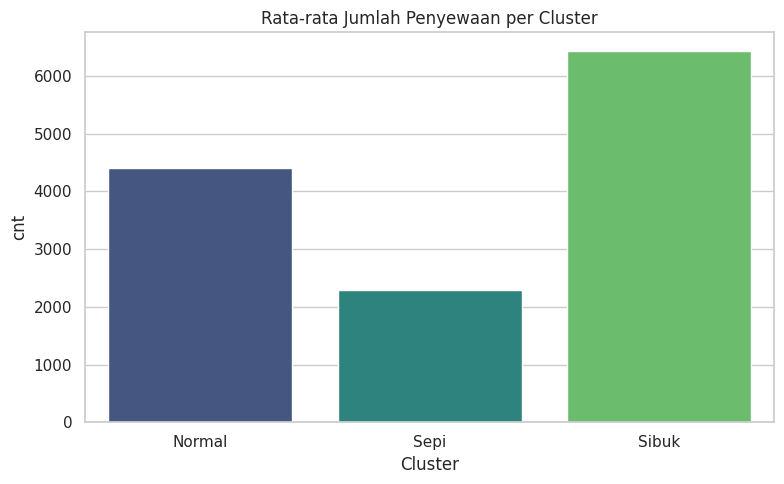

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_summary.index, y=cluster_summary['cnt'], palette='viridis')
plt.title('Rata-rata Jumlah Penyewaan per Cluster')
plt.ylabel('cnt')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

#### **Insight**

Berdasarkan segmentasi yang dilakukan terhadap data harian menggunakan nilai `cnt`, data berhasil dikelompokkan menjadi tiga cluster utama: **Sepi**, **Normal**, dan **Sibuk**.

**Cluster Sepi**
Hari-hari dalam cluster ini memiliki rata-rata penyewaan paling rendah yaitu sekitar **2.288 sepeda per hari**. Karakteristik hari-hari ini kemungkinan besar terjadi pada:

* Musim dingin
* Hari libur atau akhir pekan
* Hari dengan suhu rendah dan kecepatan angin lebih tinggi

**Cluster Normal**
Rata-rata penyewaan pada cluster ini adalah sekitar **4.406 sepeda per hari**. Hari-hari ini mencerminkan kondisi sedang, baik dari sisi cuaca maupun aktivitas masyarakat. Biasanya:

* Terjadi pada hari kerja di luar puncak musim
* Suhu sedang dan kelembaban moderat

**Cluster Sibuk**
Cluster ini menunjukkan hari-hari dengan rata-rata penyewaan tertinggi, yaitu **6.432 sepeda per hari**. Hari-hari ini sangat penting untuk pengelolaan operasional dan pasokan sepeda. Umumnya terjadi pada:

* Hari kerja
* Musim panas atau gugur
* Suhu hangat, kelembaban lebih rendah, dan kecepatan angin relatif tenang

**Kesimpulan**
Cluster ini menunjukkan bahwa tingkat penyewaan sepeda sangat dipengaruhi oleh kondisi lingkungan dan waktu (hari kerja vs libur). Informasi ini berguna untuk strategi distribusi sepeda, promosi, hingga pemeliharaan armada secara efisien berdasarkan proyeksi kepadatan harian.


## Conclusion

**Pertanyaan 1: Bagaimana perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011–2012?**
Hasil analisis menunjukkan bahwa terdapat **peningkatan yang signifikan** dalam jumlah penyewaan sepeda dari tahun 2011 ke 2012, baik di musim panas maupun musim dingin. Rata-rata penyewaan harian di musim panas lebih tinggi dibandingkan musim dingin, terutama pada tahun 2012.
Visualisasi distribusi (violin plot) menunjukkan bahwa pada tahun 2012, penyewaan sepeda pada kedua musim lebih terkonsentrasi di angka yang tinggi, menunjukkan pertumbuhan penggunaan yang merata di sepanjang tahun.
Temuan ini mengindikasikan bahwa penggunaan sepeda tidak hanya terjadi pada musim tertentu, tetapi **bersifat lintas musim**. Penyewaan tetap aktif bahkan pada musim dingin, menunjukkan peningkatan adopsi layanan bike-sharing oleh masyarakat sebagai bagian dari rutinitas harian mereka.

---

**Pertanyaan 2: Bagaimana pengaruh hari kerja dan libur terhadap jumlah penyewaan sepeda pada tahun 2011–2012?**
Penyewaan sepeda secara konsisten **lebih tinggi pada hari kerja dibandingkan hari libur**, dan perbedaannya lebih mencolok pada tahun 2012.
Rata-rata penyewaan harian pada hari kerja di tahun 2012 mencapai hampir 5800, jauh di atas hari libur yang hanya sekitar 4500. Tahun 2011 juga menunjukkan pola yang serupa meskipun dengan selisih yang lebih kecil.
Sebaran penyewaan (stripplot) menunjukkan bahwa titik-titik penyewaan pada hari kerja berada pada level yang lebih tinggi dan padat, terutama di tahun 2012. Pie chart mendukung temuan ini, menunjukkan bahwa **78.3% dari total penyewaan terjadi pada hari kerja**, dan hanya 21.7% pada hari libur.
Hal ini menunjukkan bahwa mayoritas masyarakat **menggunakan sepeda untuk aktivitas produktif seperti bekerja atau sekolah**, bukan hanya untuk rekreasi.

---

**Analisis Lanjutan: Clustering Berdasarkan Pola Aktivitas Harian**
Clustering dilakukan untuk mengelompokkan hari-hari dalam dataset berdasarkan nilai penyewaan dan faktor lingkungan. Data dikelompokkan menjadi tiga segmen:

* **Cluster Sepi**
  Rata-rata penyewaan: 2.288 sepeda/hari
  Karakteristik: suhu rendah, angin lebih kencang, dan kemungkinan besar terjadi pada hari libur dan musim dingin.

* **Cluster Normal**
  Rata-rata penyewaan: 4.406 sepeda/hari
  Karakteristik: suhu sedang, kelembaban tinggi, umum terjadi pada hari kerja biasa dengan kondisi cuaca rata-rata.

* **Cluster Sibuk**
  Rata-rata penyewaan: 6.432 sepeda/hari
  Karakteristik: suhu tinggi, kelembaban lebih rendah, angin tenang. Umumnya terjadi pada hari kerja di musim panas/gugur.

Visualisasi berupa **barplot** dan **heatmap** menunjukkan perbedaan karakteristik masing-masing cluster. Clustering ini memberikan insight strategis untuk manajemen operasional seperti **distribusi sepeda, promosi musiman, dan pengelolaan armada berdasarkan proyeksi permintaan**.